# Imports and Data Loading

In [ ]:
# Pandas and Numpy
import numpy as np
import pandas as pd

# Charting and plotting
from matplotlib import pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

# Ignore Warnings
from warnings import filterwarnings
filterwarnings("ignore")

# Regular expression library
import re

import math

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Load Dataset

In [ ]:
df_adjectives = pd.DataFrame()
for i in range(1,9):
  path = str('/content/drive/MyDrive/Mtech_Project/Dataset_Pose/landmark_Adjective_'+str(i)+'.csv')
  # df_val = pd.DataFrame()
  df_val = pd.read_csv(path)
  df_val.drop(columns='Unnamed: 0', inplace=True)
  df_adjectives = df_adjectives.append(df_val, ignore_index=True,verify_integrity=True)
  # df_adjectives = pd.concat([df_adjectives, df_val], ignore_index=True, sort=True)

In [ ]:
df_adjectives

,POSE,IMG,FRAME,TS,LEFT_WRIST_x,LEFT_WRIST_y,LEFT_WRIST_z,LEFT_WRIST_vis,LEFT_THUMB_CMC_x,LEFT_THUMB_CMC_y,...,POSE_RIGHT_HEEL_z,POSE_RIGHT_HEEL_vis,POSE_LEFT_FOOT_INDEX_x,POSE_LEFT_FOOT_INDEX_y,POSE_LEFT_FOOT_INDEX_z,POSE_LEFT_FOOT_INDEX_vis,POSE_RIGHT_FOOT_INDEX_x,POSE_RIGHT_FOOT_INDEX_y,POSE_RIGHT_FOOT_INDEX_z,POSE_RIGHT_FOOT_INDEX_vis
0,Beautiful,MVI_9569,0,0.0,0.607167,0.806386,8.596481e-08,0.0,0.590349,0.830375,...,0.393687,0.053916,0.560307,1.344798,0.362231,0.053048,0.494500,1.347031,0.222364,0.042879
1,Beautiful,MVI_9569,0,0.0,0.606570,0.813981,9.099193e-08,0.0,0.590771,0.830754,...,0.357483,0.052999,0.560125,1.357514,0.314242,0.051515,0.495409,1.351771,0.176025,0.042374
2,Beautiful,MVI_9569,0,0.0,0.606809,0.819326,9.812164e-08,0.0,0.591131,0.831970,...,0.342165,0.052645,0.560040,1.362137,0.302056,0.050673,0.496304,1.355193,0.158086,0.042530
3,Beautiful,MVI_9569,1,40.0,0.606546,0.822592,1.030027e-07,0.0,0.591249,0.833800,...,0.343702,0.051876,0.559664,1.363266,0.303876,0.049481,0.496642,1.356136,0.161331,0.042241
4,Beautiful,MVI_9569,2,80.0,0.605711,0.825212,1.043592e-07,0.0,0.590950,0.836394,...,0.347599,0.051147,0.559654,1.363617,0.309015,0.048273,0.497252,1.356422,0.166095,0.041994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46480,Healthy,MVI_5175,90,3600.0,0.612024,0.794134,1.031726e-07,0.0,0.598269,0.813480,...,0.383509,0.166905,0.560612,1.391355,0.300919,0.145071,0.484877,1.411491,0.167158,0.181242
46481,Healthy,MVI_5175,91,3640.0,0.612175,0.791324,9.379350e-08,0.0,0.598482,0.811732,...,0.380587,0.165969,0.566203,1.390909,0.296817,0.145760,0.486522,1.409704,0.150813,0.182343
46482,Healthy,MVI_5175,92,3680.0,0.612450,0.793368,9.653819e-08,0.0,0.598975,0.813712,...,0.362320,0.166802,0.567879,1.385437,0.300432,0.146007,0.486542,1.402168,0.143186,0.182622
46483,Healthy,MVI_5175,93,3720.0,0.612338,0.792345,8.701394e-08,0.0,0.598855,0.812796,...,0.354845,0.167685,0.566114,1.381714,0.297094,0.142907,0.485897,1.397372,0.130059,0.180787


# EDA

## Filter the visibility columns

In [ ]:
re.compile(r"[a-zA-Z0-9]*")
vis_col = list()
for col in df_poses.columns:
  if re.search(' ?vis', col):
    vis_col.append(col)

print(vis_col)

['LEFT_WRIST_vis', 'LEFT_THUMB_CMC_vis', 'LEFT_THUMB_MCP_vis', 'LEFT_THUMB_IP_vis', 'LEFT_THUMB_TIP_vis', 'LEFT_INDEX_FINGER_MCP_vis', 'LEFT_INDEX_FINGER_PIP_vis', 'LEFT_INDEX_FINGER_DIP_vis', 'LEFT_INDEX_FINGER_TIP_vis', 'LEFT_MIDDLE_FINGER_MCP_vis', 'LEFT_MIDDLE_FINGER_PIP_vis', 'LEFT_MIDDLE_FINGER_DIP_vis', 'LEFT_MIDDLE_FINGER_TIP_vis', 'LEFT_RING_FINGER_MCP_vis', 'LEFT_RING_FINGER_PIP_vis', 'LEFT_RING_FINGER_DIP_vis', 'LEFT_RING_FINGER_TIP_vis', 'LEFT_PINKY_MCP_vis', 'LEFT_PINKY_PIP_vis', 'LEFT_PINKY_DIP_vis', 'LEFT_PINKY_TIP_vis', 'RIGHT_WRIST_vis', 'RIGHT_THUMB_CMC_vis', 'RIGHT_THUMB_MCP_vis', 'RIGHT_THUMB_IP_vis', 'RIGHT_THUMB_TIP_vis', 'RIGHT_INDEX_FINGER_MCP_vis', 'RIGHT_INDEX_FINGER_PIP_vis', 'RIGHT_INDEX_FINGER_DIP_vis', 'RIGHT_INDEX_FINGER_TIP_vis', 'RIGHT_MIDDLE_FINGER_MCP_vis', 'RIGHT_MIDDLE_FINGER_PIP_vis', 'RIGHT_MIDDLE_FINGER_DIP_vis', 'RIGHT_MIDDLE_FINGER_TIP_vis', 'RIGHT_RING_FINGER_MCP_vis', 'RIGHT_RING_FINGER_PIP_vis', 'RIGHT_RING_FINGER_DIP_vis', 'RIGHT_RING_FINGE

In [ ]:
df_vis = pd.DataFrame(data = df_poses , columns = vis_col)
df_vis.head()

,LEFT_WRIST_vis,LEFT_THUMB_CMC_vis,LEFT_THUMB_MCP_vis,LEFT_THUMB_IP_vis,LEFT_THUMB_TIP_vis,LEFT_INDEX_FINGER_MCP_vis,LEFT_INDEX_FINGER_PIP_vis,LEFT_INDEX_FINGER_DIP_vis,LEFT_INDEX_FINGER_TIP_vis,LEFT_MIDDLE_FINGER_MCP_vis,...,POSE_LEFT_HIP_vis,POSE_RIGHT_HIP_vis,POSE_LEFT_KNEE_vis,POSE_RIGHT_KNEE_vis,POSE_LEFT_ANKLE_vis,POSE_RIGHT_ANKLE_vis,POSE_LEFT_HEEL_vis,POSE_RIGHT_HEEL_vis,POSE_LEFT_FOOT_INDEX_vis,POSE_RIGHT_FOOT_INDEX_vis
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.997779,0.997063,0.684466,0.533916,0.081150,0.056166,0.089239,0.053916,0.053048,0.042879
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.997724,0.996970,0.667522,0.520207,0.078649,0.055571,0.085712,0.052999,0.051515,0.042374
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.997653,0.996868,0.653959,0.509147,0.077195,0.055942,0.083195,0.052645,0.050673,0.042530
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.997626,0.996809,0.641874,0.497847,0.075440,0.055766,0.080454,0.051876,0.049481,0.042241
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.997603,0.996772,0.627479,0.485774,0.073541,0.055423,0.077720,0.051147,0.048273,0.041994


<Axes: >

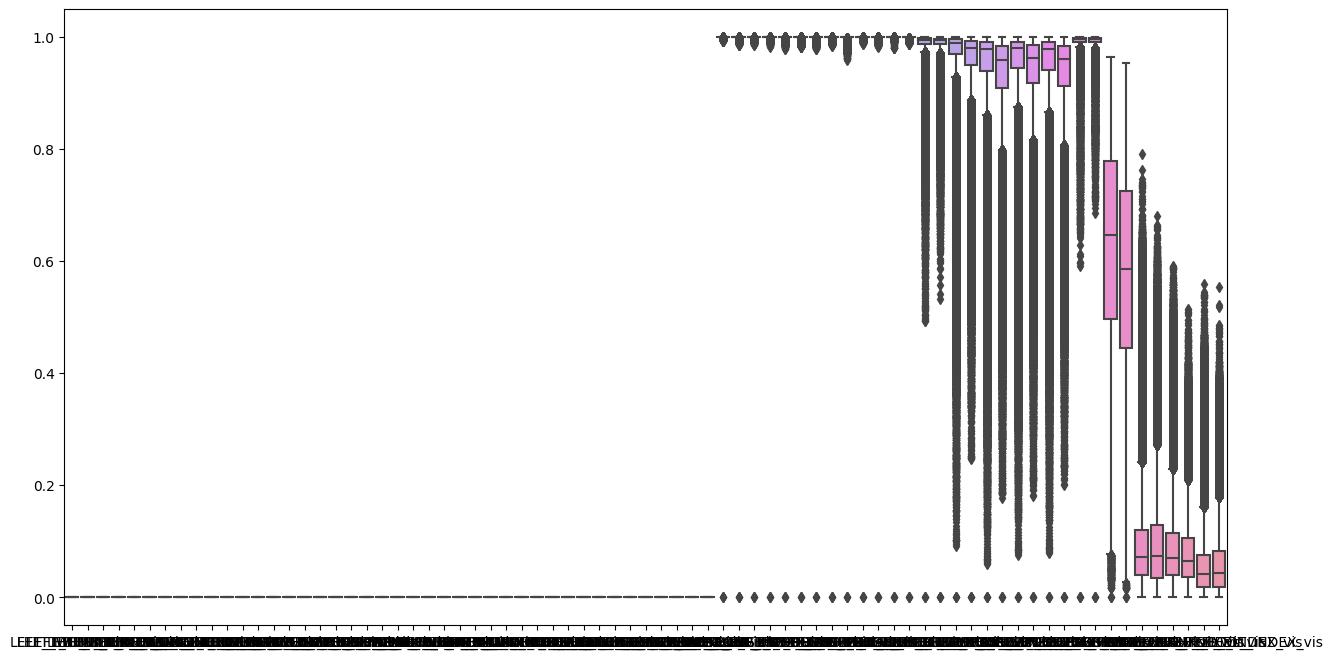

In [ ]:
rcParams['figure.figsize'] = 15,8
sns.boxplot(data=df_vis)

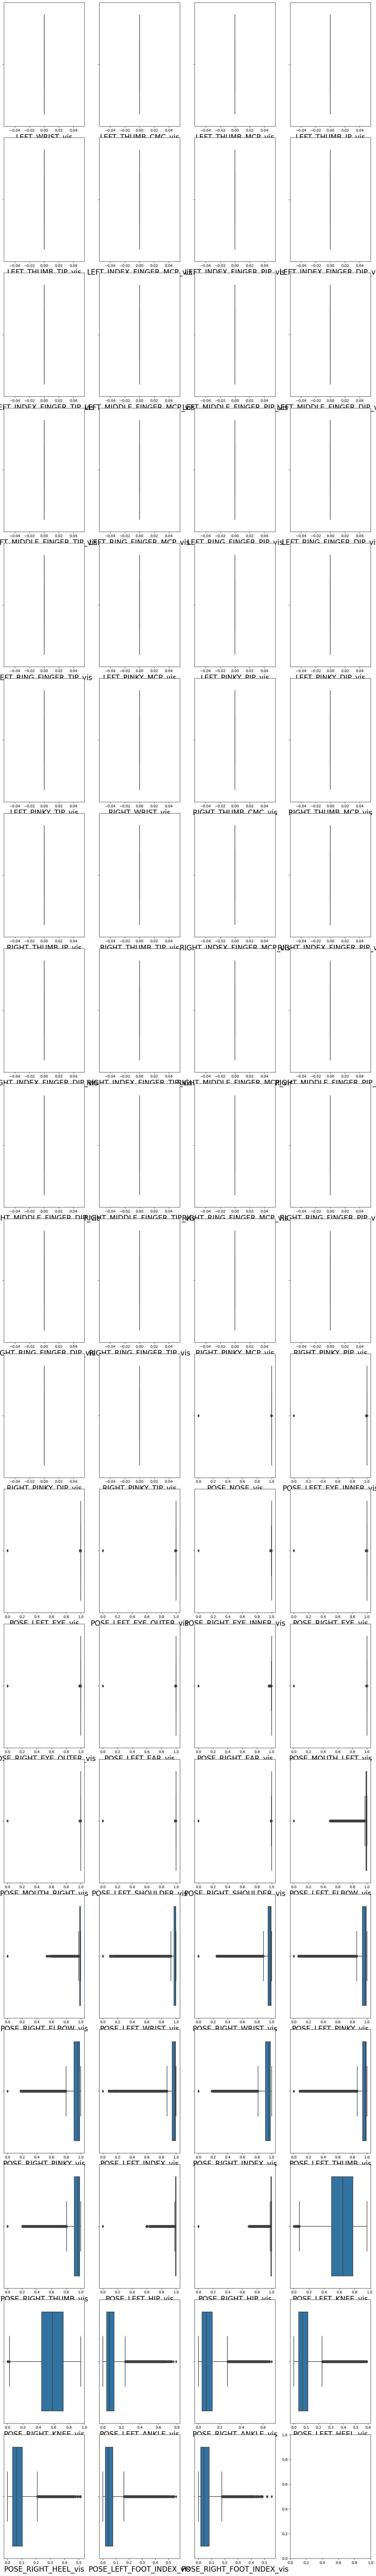

In [ ]:
fig, ax = plt.subplots(nrows = 19, ncols = 4, figsize=(15, 100))
plt.tight_layout() # adjust the subplots

for variable, subplot in zip(df_vis.columns, ax.flatten()):
  z = sns.boxplot(x = df_vis[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
  z.set_xlabel(variable, fontsize = 20)

## Drop Invisible columns

In [ ]:
re.compile(r"[a-zA-Z0-9]*")
invisible_set = list()
for col in df_poses.columns:
  if re.search(' ?_KNEE_?', col):
    invisible_set.append(col)
  if re.search(' ?_HIP_?', col):
    invisible_set.append(col)
  if re.search(' ?_ANKLE_?', col):
    invisible_set.append(col)
  if re.search(' ?_HEEL_?', col):
    invisible_set.append(col)
  if re.search(' ?_FOOT_?', col):
    invisible_set.append(col)
print(invisible_set)

['POSE_LEFT_HIP_x', 'POSE_LEFT_HIP_y', 'POSE_LEFT_HIP_z', 'POSE_LEFT_HIP_vis', 'POSE_RIGHT_HIP_x', 'POSE_RIGHT_HIP_y', 'POSE_RIGHT_HIP_z', 'POSE_RIGHT_HIP_vis', 'POSE_LEFT_KNEE_x', 'POSE_LEFT_KNEE_y', 'POSE_LEFT_KNEE_z', 'POSE_LEFT_KNEE_vis', 'POSE_RIGHT_KNEE_x', 'POSE_RIGHT_KNEE_y', 'POSE_RIGHT_KNEE_z', 'POSE_RIGHT_KNEE_vis', 'POSE_LEFT_ANKLE_x', 'POSE_LEFT_ANKLE_y', 'POSE_LEFT_ANKLE_z', 'POSE_LEFT_ANKLE_vis', 'POSE_RIGHT_ANKLE_x', 'POSE_RIGHT_ANKLE_y', 'POSE_RIGHT_ANKLE_z', 'POSE_RIGHT_ANKLE_vis', 'POSE_LEFT_HEEL_x', 'POSE_LEFT_HEEL_y', 'POSE_LEFT_HEEL_z', 'POSE_LEFT_HEEL_vis', 'POSE_RIGHT_HEEL_x', 'POSE_RIGHT_HEEL_y', 'POSE_RIGHT_HEEL_z', 'POSE_RIGHT_HEEL_vis', 'POSE_LEFT_FOOT_INDEX_x', 'POSE_LEFT_FOOT_INDEX_y', 'POSE_LEFT_FOOT_INDEX_z', 'POSE_LEFT_FOOT_INDEX_vis', 'POSE_RIGHT_FOOT_INDEX_x', 'POSE_RIGHT_FOOT_INDEX_y', 'POSE_RIGHT_FOOT_INDEX_z', 'POSE_RIGHT_FOOT_INDEX_vis']


In [ ]:
df_poses_1 = df_poses.drop(labels = invisible_set, axis=1)
df_poses_1

,POSE,IMG,FRAME,TS,LEFT_WRIST_x,LEFT_WRIST_y,LEFT_WRIST_z,LEFT_WRIST_vis,LEFT_THUMB_CMC_x,LEFT_THUMB_CMC_y,...,POSE_RIGHT_INDEX_z,POSE_RIGHT_INDEX_vis,POSE_LEFT_THUMB_x,POSE_LEFT_THUMB_y,POSE_LEFT_THUMB_z,POSE_LEFT_THUMB_vis,POSE_RIGHT_THUMB_x,POSE_RIGHT_THUMB_y,POSE_RIGHT_THUMB_z,POSE_RIGHT_THUMB_vis
0,Beautiful,MVI_9569,0,0.0,0.607167,0.806386,8.596481e-08,0.0,0.590349,0.830375,...,-0.450396,0.911627,0.595081,0.851415,-0.263310,0.962085,0.475888,0.836020,-0.381579,0.912166
1,Beautiful,MVI_9569,0,0.0,0.606570,0.813981,9.099193e-08,0.0,0.590771,0.830754,...,-0.450483,0.914923,0.594894,0.851404,-0.281046,0.963650,0.474890,0.836244,-0.379993,0.914982
2,Beautiful,MVI_9569,0,0.0,0.606809,0.819326,9.812164e-08,0.0,0.591131,0.831970,...,-0.454602,0.917961,0.594709,0.851459,-0.287423,0.965070,0.474398,0.836246,-0.381132,0.917551
3,Beautiful,MVI_9569,1,40.0,0.606546,0.822592,1.030027e-07,0.0,0.591249,0.833800,...,-0.453138,0.920753,0.594471,0.851657,-0.284540,0.966499,0.473749,0.836332,-0.378115,0.919970
4,Beautiful,MVI_9569,2,80.0,0.605711,0.825212,1.043592e-07,0.0,0.590950,0.836394,...,-0.453109,0.923793,0.594466,0.851667,-0.285241,0.967854,0.473386,0.837021,-0.377877,0.922698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250488,God,MVI_8747,68,2720.0,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,...,-0.465642,0.821284,0.553618,0.857185,-0.378420,0.758086,0.419931,0.871482,-0.403383,0.832884
250489,God,MVI_8747,69,2760.0,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,...,-0.467116,0.822298,0.553384,0.855930,-0.371127,0.761228,0.420130,0.870378,-0.403777,0.833787
250490,God,MVI_8747,70,2800.0,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,...,-0.478150,0.823782,0.553364,0.855240,-0.382270,0.764708,0.420711,0.871223,-0.414317,0.835184
250491,God,MVI_8747,71,2840.0,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,...,-0.471564,0.823036,0.553373,0.854331,-0.378351,0.759949,0.420834,0.870483,-0.408900,0.834897


## Drop all Z and Vis coordinates

In [ ]:
re.compile(r"[a-zA-Z0-9]*")
z_set = list()
for col in df_poses_1.columns:
  if re.search(' ?_z', col):
    z_set.append(col)
  if re.search(' ?_vis', col):
    z_set.append(col)
print(z_set)

['LEFT_WRIST_z', 'LEFT_WRIST_vis', 'LEFT_THUMB_CMC_z', 'LEFT_THUMB_CMC_vis', 'LEFT_THUMB_MCP_z', 'LEFT_THUMB_MCP_vis', 'LEFT_THUMB_IP_z', 'LEFT_THUMB_IP_vis', 'LEFT_THUMB_TIP_z', 'LEFT_THUMB_TIP_vis', 'LEFT_INDEX_FINGER_MCP_z', 'LEFT_INDEX_FINGER_MCP_vis', 'LEFT_INDEX_FINGER_PIP_z', 'LEFT_INDEX_FINGER_PIP_vis', 'LEFT_INDEX_FINGER_DIP_z', 'LEFT_INDEX_FINGER_DIP_vis', 'LEFT_INDEX_FINGER_TIP_z', 'LEFT_INDEX_FINGER_TIP_vis', 'LEFT_MIDDLE_FINGER_MCP_z', 'LEFT_MIDDLE_FINGER_MCP_vis', 'LEFT_MIDDLE_FINGER_PIP_z', 'LEFT_MIDDLE_FINGER_PIP_vis', 'LEFT_MIDDLE_FINGER_DIP_z', 'LEFT_MIDDLE_FINGER_DIP_vis', 'LEFT_MIDDLE_FINGER_TIP_z', 'LEFT_MIDDLE_FINGER_TIP_vis', 'LEFT_RING_FINGER_MCP_z', 'LEFT_RING_FINGER_MCP_vis', 'LEFT_RING_FINGER_PIP_z', 'LEFT_RING_FINGER_PIP_vis', 'LEFT_RING_FINGER_DIP_z', 'LEFT_RING_FINGER_DIP_vis', 'LEFT_RING_FINGER_TIP_z', 'LEFT_RING_FINGER_TIP_vis', 'LEFT_PINKY_MCP_z', 'LEFT_PINKY_MCP_vis', 'LEFT_PINKY_PIP_z', 'LEFT_PINKY_PIP_vis', 'LEFT_PINKY_DIP_z', 'LEFT_PINKY_DIP_vis', '

In [ ]:
df_poses_2 = df_poses_1.drop(labels = z_set, axis=1)
df_poses_2

,POSE,IMG,FRAME,TS,LEFT_WRIST_x,LEFT_WRIST_y,LEFT_THUMB_CMC_x,LEFT_THUMB_CMC_y,LEFT_THUMB_MCP_x,LEFT_THUMB_MCP_y,...,POSE_RIGHT_PINKY_x,POSE_RIGHT_PINKY_y,POSE_LEFT_INDEX_x,POSE_LEFT_INDEX_y,POSE_RIGHT_INDEX_x,POSE_RIGHT_INDEX_y,POSE_LEFT_THUMB_x,POSE_LEFT_THUMB_y,POSE_RIGHT_THUMB_x,POSE_RIGHT_THUMB_y
0,Beautiful,MVI_9569,0,0.0,0.607167,0.806386,0.590349,0.830375,0.582493,0.858022,...,0.456106,0.858859,0.597248,0.869022,0.472141,0.853802,0.595081,0.851415,0.475888,0.836020
1,Beautiful,MVI_9569,0,0.0,0.606570,0.813981,0.590771,0.830754,0.582108,0.856580,...,0.454987,0.859721,0.597186,0.870145,0.471185,0.856732,0.594894,0.851404,0.474890,0.836244
2,Beautiful,MVI_9569,0,0.0,0.606809,0.819326,0.591131,0.831970,0.582632,0.857280,...,0.454187,0.859994,0.597073,0.871321,0.470682,0.857721,0.594709,0.851459,0.474398,0.836246
3,Beautiful,MVI_9569,1,40.0,0.606546,0.822592,0.591249,0.833800,0.582751,0.857358,...,0.453328,0.860236,0.596881,0.872500,0.470018,0.858463,0.594471,0.851657,0.473749,0.836332
4,Beautiful,MVI_9569,2,80.0,0.605711,0.825212,0.590950,0.836394,0.582433,0.860147,...,0.452860,0.861305,0.596883,0.872789,0.469606,0.860016,0.594466,0.851667,0.473386,0.837021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250488,God,MVI_8747,68,2720.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.406513,0.887957,0.557353,0.876048,0.415540,0.893709,0.553618,0.857185,0.419931,0.871482
250489,God,MVI_8747,69,2760.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.406665,0.886351,0.556918,0.874635,0.415689,0.892046,0.553384,0.855930,0.420130,0.870378
250490,God,MVI_8747,70,2800.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.407035,0.886422,0.556783,0.873355,0.416105,0.893046,0.553364,0.855240,0.420711,0.871223
250491,God,MVI_8747,71,2840.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.407103,0.885510,0.556785,0.872364,0.416195,0.892143,0.553373,0.854331,0.420834,0.870483


## Keep upto 180 Frames = 7+ sec video of 25 Frames/sec

In [ ]:
list(set(df_poses_2.IMG))[:5]

['MVI_9764', 'MVI_0010', 'MVI_4006', 'MVI_4947', 'MVI_5139']

In [ ]:
images = list(set(df_poses_2.IMG))
#img = 'MVI_9376'
df_poses_3 = pd.DataFrame()
for img in images:
  temp_df = pd.DataFrame()
  max_pt = df_piv_adj.FRAME.get(img)
  if (max_pt < 180):
    temp_df = df_poses_2[df_poses_2.IMG == img]
    additional_pts = 180 - max_pt
    #print(additional_pts)
    for i in range(0, additional_pts):
      temp_df = temp_df.append((temp_df[-1:]), ignore_index = True)
    print("Image: ",img,"| Frames: ",max_pt,"| Redused Frames: ",len(temp_df))
  df_poses_3 = df_poses_3.append(temp_df, ignore_index = True)
#df_poses_3
#temp_df

Image:  MVI_9764 | Frames:  61 | Redused Frames:  180
Image:  MVI_0010 | Frames:  134 | Redused Frames:  180
Image:  MVI_4006 | Frames:  66 | Redused Frames:  180
Image:  MVI_4947 | Frames:  103 | Redused Frames:  180
Image:  MVI_5139 | Frames:  108 | Redused Frames:  180
Image:  MVI_9335 | Frames:  57 | Redused Frames:  180
Image:  MVI_4114 | Frames:  65 | Redused Frames:  180
Image:  MVI_5348 | Frames:  51 | Redused Frames:  180
Image:  MVI_3762 | Frames:  46 | Redused Frames:  180
Image:  MVI_8657 | Frames:  118 | Redused Frames:  180
Image:  MVI_9145 | Frames:  67 | Redused Frames:  180
Image:  MVI_3925 | Frames:  64 | Redused Frames:  180
Image:  MVI_4089 | Frames:  80 | Redused Frames:  180
Image:  MVI_5518 | Frames:  34 | Redused Frames:  180
Image:  MVI_9539 | Frames:  65 | Redused Frames:  180
Image:  MVI_4516 | Frames:  67 | Redused Frames:  180
Image:  MVI_4151 | Frames:  48 | Redused Frames:  180
Image:  MVI_4424 | Frames:  48 | Redused Frames:  180
Image:  MVI_5259 | Frame

In [ ]:
#df_poses_3[df_poses_3.IMG == 'MVI_9376']

,POSE,IMG,FRAME,TS,LEFT_WRIST_x,LEFT_WRIST_y,LEFT_THUMB_CMC_x,LEFT_THUMB_CMC_y,LEFT_THUMB_MCP_x,LEFT_THUMB_MCP_y,...,POSE_RIGHT_PINKY_x,POSE_RIGHT_PINKY_y,POSE_LEFT_INDEX_x,POSE_LEFT_INDEX_y,POSE_RIGHT_INDEX_x,POSE_RIGHT_INDEX_y,POSE_LEFT_THUMB_x,POSE_LEFT_THUMB_y,POSE_RIGHT_THUMB_x,POSE_RIGHT_THUMB_y
335340,Happy,MVI_9376,0,0.0,0.542959,0.838464,0.529533,0.849196,0.523561,0.872364,...,0.389577,0.879479,0.537551,0.875123,0.402373,0.884478,0.532960,0.859582,0.404712,0.865293
335341,Happy,MVI_9376,1,40.0,0.542602,0.833656,0.528808,0.843823,0.522108,0.865565,...,0.388184,0.880065,0.537017,0.876401,0.402127,0.884465,0.532051,0.861333,0.405042,0.866241
335342,Happy,MVI_9376,2,80.0,0.542211,0.821857,0.527883,0.830392,0.520135,0.852959,...,0.387116,0.873622,0.533786,0.873363,0.401920,0.878164,0.528535,0.857658,0.405265,0.858946
335343,Happy,MVI_9376,3,120.0,0.542293,0.807601,0.527587,0.812302,0.518662,0.832876,...,0.386521,0.864869,0.529356,0.866958,0.401053,0.869711,0.525161,0.848476,0.404885,0.846715
335344,Happy,MVI_9376,4,160.0,0.541678,0.787506,0.526934,0.788003,0.517012,0.806962,...,0.387777,0.843153,0.528100,0.835548,0.402062,0.844350,0.525007,0.815368,0.405825,0.823722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335515,Happy,MVI_9376,35,1400.0,0.543511,0.835444,0.530192,0.844262,0.520765,0.864004,...,0.386132,0.889246,0.535983,0.874833,0.401281,0.894673,0.531109,0.858385,0.405979,0.871642
335516,Happy,MVI_9376,35,1400.0,0.543511,0.835444,0.530192,0.844262,0.520765,0.864004,...,0.386132,0.889246,0.535983,0.874833,0.401281,0.894673,0.531109,0.858385,0.405979,0.871642
335517,Happy,MVI_9376,35,1400.0,0.543511,0.835444,0.530192,0.844262,0.520765,0.864004,...,0.386132,0.889246,0.535983,0.874833,0.401281,0.894673,0.531109,0.858385,0.405979,0.871642
335518,Happy,MVI_9376,35,1400.0,0.543511,0.835444,0.530192,0.844262,0.520765,0.864004,...,0.386132,0.889246,0.535983,0.874833,0.401281,0.894673,0.531109,0.858385,0.405979,0.871642


In [ ]:
df_piv_adj_3 = df_poses_3[['IMG','FRAME']].pivot_table(index='IMG', aggfunc='count')
print('max frames =',max(df_piv_adj_3['FRAME']))
print('min frames =',min(df_piv_adj_3['FRAME']))
print('avg frames =',np.average(df_piv_adj_3['FRAME']))

max frames = 180
min frames = 180
avg frames = 180.0


## Add new Index column

In [ ]:
df_poses_3.sort_index()

,POSE,IMG,FRAME,TS,LEFT_WRIST_x,LEFT_WRIST_y,LEFT_THUMB_CMC_x,LEFT_THUMB_CMC_y,LEFT_THUMB_MCP_x,LEFT_THUMB_MCP_y,...,POSE_RIGHT_PINKY_x,POSE_RIGHT_PINKY_y,POSE_LEFT_INDEX_x,POSE_LEFT_INDEX_y,POSE_RIGHT_INDEX_x,POSE_RIGHT_INDEX_y,POSE_LEFT_THUMB_x,POSE_LEFT_THUMB_y,POSE_RIGHT_THUMB_x,POSE_RIGHT_THUMB_y
0,Job,MVI_4522,0,0.0,0.592420,0.843613,0.582637,0.860974,0.576639,0.885002,...,0.437458,0.836044,0.580834,0.841485,0.444708,0.839198,0.576328,0.816781,0.446872,0.817609
1,Job,MVI_4522,1,40.0,0.594426,0.845151,0.581768,0.863198,0.574916,0.888435,...,0.436738,0.843728,0.577087,0.834980,0.443961,0.862614,0.572481,0.809937,0.446385,0.830403
2,Job,MVI_4522,2,80.0,0.593597,0.844645,0.581462,0.861763,0.575295,0.888441,...,0.435628,0.840818,0.574120,0.824461,0.443389,0.854811,0.569637,0.799573,0.446152,0.824911
3,Job,MVI_4522,3,120.0,0.592467,0.844556,0.599463,0.860745,0.601227,0.883104,...,0.435428,0.871914,0.570904,0.823057,0.442953,0.878424,0.561389,0.806581,0.445890,0.842781
4,Job,MVI_4522,4,160.0,0.594236,0.844248,0.581517,0.860448,0.575655,0.887129,...,0.433678,0.881949,0.569923,0.820656,0.441521,0.886333,0.560447,0.808037,0.445347,0.850788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146195,Parent,MVI_5084,64,2560.0,0.552415,0.830759,0.541016,0.847238,0.536236,0.872029,...,0.394473,0.770502,0.547144,0.869787,0.402231,0.769704,0.543399,0.852520,0.404002,0.751344
146196,Parent,MVI_5084,64,2560.0,0.552415,0.830759,0.541016,0.847238,0.536236,0.872029,...,0.394473,0.770502,0.547144,0.869787,0.402231,0.769704,0.543399,0.852520,0.404002,0.751344
146197,Parent,MVI_5084,64,2560.0,0.552415,0.830759,0.541016,0.847238,0.536236,0.872029,...,0.394473,0.770502,0.547144,0.869787,0.402231,0.769704,0.543399,0.852520,0.404002,0.751344
146198,Parent,MVI_5084,64,2560.0,0.552415,0.830759,0.541016,0.847238,0.536236,0.872029,...,0.394473,0.770502,0.547144,0.869787,0.402231,0.769704,0.543399,0.852520,0.404002,0.751344


In [ ]:
df_poses_3.reset_index(drop=True, inplace=True)
df_poses_3

,POSE,IMG,FRAME,TS,LEFT_WRIST_x,LEFT_WRIST_y,LEFT_THUMB_CMC_x,LEFT_THUMB_CMC_y,LEFT_THUMB_MCP_x,LEFT_THUMB_MCP_y,...,POSE_RIGHT_PINKY_x,POSE_RIGHT_PINKY_y,POSE_LEFT_INDEX_x,POSE_LEFT_INDEX_y,POSE_RIGHT_INDEX_x,POSE_RIGHT_INDEX_y,POSE_LEFT_THUMB_x,POSE_LEFT_THUMB_y,POSE_RIGHT_THUMB_x,POSE_RIGHT_THUMB_y
0,Job,MVI_4522,0,0.0,0.592420,0.843613,0.582637,0.860974,0.576639,0.885002,...,0.437458,0.836044,0.580834,0.841485,0.444708,0.839198,0.576328,0.816781,0.446872,0.817609
1,Job,MVI_4522,1,40.0,0.594426,0.845151,0.581768,0.863198,0.574916,0.888435,...,0.436738,0.843728,0.577087,0.834980,0.443961,0.862614,0.572481,0.809937,0.446385,0.830403
2,Job,MVI_4522,2,80.0,0.593597,0.844645,0.581462,0.861763,0.575295,0.888441,...,0.435628,0.840818,0.574120,0.824461,0.443389,0.854811,0.569637,0.799573,0.446152,0.824911
3,Job,MVI_4522,3,120.0,0.592467,0.844556,0.599463,0.860745,0.601227,0.883104,...,0.435428,0.871914,0.570904,0.823057,0.442953,0.878424,0.561389,0.806581,0.445890,0.842781
4,Job,MVI_4522,4,160.0,0.594236,0.844248,0.581517,0.860448,0.575655,0.887129,...,0.433678,0.881949,0.569923,0.820656,0.441521,0.886333,0.560447,0.808037,0.445347,0.850788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146195,Parent,MVI_5084,64,2560.0,0.552415,0.830759,0.541016,0.847238,0.536236,0.872029,...,0.394473,0.770502,0.547144,0.869787,0.402231,0.769704,0.543399,0.852520,0.404002,0.751344
146196,Parent,MVI_5084,64,2560.0,0.552415,0.830759,0.541016,0.847238,0.536236,0.872029,...,0.394473,0.770502,0.547144,0.869787,0.402231,0.769704,0.543399,0.852520,0.404002,0.751344
146197,Parent,MVI_5084,64,2560.0,0.552415,0.830759,0.541016,0.847238,0.536236,0.872029,...,0.394473,0.770502,0.547144,0.869787,0.402231,0.769704,0.543399,0.852520,0.404002,0.751344
146198,Parent,MVI_5084,64,2560.0,0.552415,0.830759,0.541016,0.847238,0.536236,0.872029,...,0.394473,0.770502,0.547144,0.869787,0.402231,0.769704,0.543399,0.852520,0.404002,0.751344


## Reset Frame numbering

In [ ]:
df_poses_3[(df_poses_3.IMG == 'MVI_5223')&(df_poses_3.FRAME == 41)].index

Int64Index([], dtype='int64')

In [ ]:
tmp_frames = list((df_poses_3[df_poses_3.IMG == 'MVI_9653'].index))
print(tmp_frames)

[33150, 33151, 33152, 33153, 33154, 33155, 33156, 33157, 33158, 33159, 33160, 33161, 33162, 33163, 33164, 33165, 33166, 33167, 33168, 33169, 33170, 33171, 33172, 33173, 33174, 33175, 33176, 33177, 33178, 33179, 33180, 33181, 33182, 33183, 33184, 33185, 33186, 33187, 33188, 33189, 33190, 33191, 33192, 33193, 33194, 33195, 33196, 33197, 33198, 33199, 33200, 33201, 33202, 33203, 33204, 33205, 33206, 33207, 33208, 33209, 33210, 33211, 33212, 33213, 33214, 33215, 33216, 33217, 33218, 33219, 33220, 33221, 33222, 33223, 33224, 33225, 33226, 33227, 33228, 33229, 33230, 33231, 33232, 33233, 33234]


In [ ]:
tmp_frames = list((df_poses_3[df_poses_3.IMG == 'MVI_9653'].FRAME))
print(tmp_frames)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71]


In [ ]:
#df_adjectives_3[df_adjectives_3.IMG == 'MVI_9661'][['POSE','IMG','FRAME','FRAME_2']]

In [ ]:
for img in images:
  # img = 'MVI_9660'
  # frames = list(set(df_adjectives_3[df_adjectives_3.IMG == img].FRAME))
  idxs = list((df_poses_3[df_poses_3.IMG == img].index))
  i = 1
  #df_temp = df_adjectives_3[(df_adjectives_3.IMG == img)&(df_adjectives_3.FRAME == frames)].index
  for idx in idxs:
    df_poses_3.at[idx,'FRAME_2'] = i
    print('Image:',img,'|','Index:',idx,'|','I_Val:',i)
    i+=1

Streaming output truncated to the last 5000 lines.
Image: MVI_9029 | Index: 141200 | I_Val: 16
Image: MVI_9029 | Index: 141201 | I_Val: 17
Image: MVI_9029 | Index: 141202 | I_Val: 18
Image: MVI_9029 | Index: 141203 | I_Val: 19
Image: MVI_9029 | Index: 141204 | I_Val: 20
Image: MVI_9029 | Index: 141205 | I_Val: 21
Image: MVI_9029 | Index: 141206 | I_Val: 22
Image: MVI_9029 | Index: 141207 | I_Val: 23
Image: MVI_9029 | Index: 141208 | I_Val: 24
Image: MVI_9029 | Index: 141209 | I_Val: 25
Image: MVI_9029 | Index: 141210 | I_Val: 26
Image: MVI_9029 | Index: 141211 | I_Val: 27
Image: MVI_9029 | Index: 141212 | I_Val: 28
Image: MVI_9029 | Index: 141213 | I_Val: 29
Image: MVI_9029 | Index: 141214 | I_Val: 30
Image: MVI_9029 | Index: 141215 | I_Val: 31
Image: MVI_9029 | Index: 141216 | I_Val: 32
Image: MVI_9029 | Index: 141217 | I_Val: 33
Image: MVI_9029 | Index: 141218 | I_Val: 34
Image: MVI_9029 | Index: 141219 | I_Val: 35
Image: MVI_9029 | Index: 141220 | I_Val: 36
Image: MVI_9029 | Index: 

In [ ]:
df_poses_3

,Unnamed: 0,POSE,IMG,TS,LEFT_WRIST_x,LEFT_WRIST_y,LEFT_THUMB_CMC_x,LEFT_THUMB_CMC_y,LEFT_THUMB_MCP_x,LEFT_THUMB_MCP_y,...,POSE_RIGHT_PINKY_y,POSE_LEFT_INDEX_x,POSE_LEFT_INDEX_y,POSE_RIGHT_INDEX_x,POSE_RIGHT_INDEX_y,POSE_LEFT_THUMB_x,POSE_LEFT_THUMB_y,POSE_RIGHT_THUMB_x,POSE_RIGHT_THUMB_y,FRAME
0,0,Male,MVI_9764,0.0,0.554524,0.818952,0.541361,0.838500,0.535188,0.862879,...,0.884026,0.556969,0.869969,0.421249,0.883424,0.552976,0.852818,0.427020,0.864435,1.0
1,1,Male,MVI_9764,40.0,0.553981,0.821863,0.541467,0.837821,0.535376,0.861729,...,0.884834,0.551052,0.868154,0.413834,0.884933,0.546053,0.851548,0.417822,0.866165,2.0
2,2,Male,MVI_9764,80.0,0.554276,0.824348,0.541305,0.839069,0.534952,0.862659,...,0.881704,0.550092,0.867524,0.413142,0.882253,0.544312,0.850722,0.416393,0.863463,3.0
3,3,Male,MVI_9764,120.0,0.554318,0.824571,0.541338,0.838520,0.535285,0.861851,...,0.881871,0.547917,0.867595,0.413688,0.882839,0.542284,0.850598,0.417172,0.864719,4.0
4,4,Male,MVI_9764,160.0,0.554147,0.824796,0.541369,0.839236,0.535553,0.862553,...,0.879309,0.546395,0.867259,0.412703,0.880551,0.541174,0.849412,0.416539,0.862843,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606415,606415,Doctor,MVI_4754,2400.0,0.570167,0.730097,0.559433,0.743965,0.556262,0.770139,...,0.769723,0.569426,0.773140,0.378972,0.769595,0.564179,0.757164,0.384995,0.753306,176.0
606416,606416,Doctor,MVI_4754,2400.0,0.570167,0.730097,0.559433,0.743965,0.556262,0.770139,...,0.769723,0.569426,0.773140,0.378972,0.769595,0.564179,0.757164,0.384995,0.753306,177.0
606417,606417,Doctor,MVI_4754,2400.0,0.570167,0.730097,0.559433,0.743965,0.556262,0.770139,...,0.769723,0.569426,0.773140,0.378972,0.769595,0.564179,0.757164,0.384995,0.753306,178.0
606418,606418,Doctor,MVI_4754,2400.0,0.570167,0.730097,0.559433,0.743965,0.556262,0.770139,...,0.769723,0.569426,0.773140,0.378972,0.769595,0.564179,0.757164,0.384995,0.753306,179.0


In [ ]:
df_poses_4 = df_poses_3.drop(labels='FRAME', axis =1)
df_poses_4.head(2)

,POSE,IMG,TS,LEFT_WRIST_x,LEFT_WRIST_y,LEFT_THUMB_CMC_x,LEFT_THUMB_CMC_y,LEFT_THUMB_MCP_x,LEFT_THUMB_MCP_y,LEFT_THUMB_IP_x,...,POSE_RIGHT_PINKY_y,POSE_LEFT_INDEX_x,POSE_LEFT_INDEX_y,POSE_RIGHT_INDEX_x,POSE_RIGHT_INDEX_y,POSE_LEFT_THUMB_x,POSE_LEFT_THUMB_y,POSE_RIGHT_THUMB_x,POSE_RIGHT_THUMB_y,FRAME_2
0,Job,MVI_4522,0.0,0.592420,0.843613,0.582637,0.860974,0.576639,0.885002,0.574491,...,0.836044,0.580834,0.841485,0.444708,0.839198,0.576328,0.816781,0.446872,0.817609,1.0
1,Job,MVI_4522,40.0,0.594426,0.845151,0.581768,0.863198,0.574916,0.888435,0.573076,...,0.843728,0.577087,0.834980,0.443961,0.862614,0.572481,0.809937,0.446385,0.830403,2.0


In [ ]:
df_poses_4.rename(columns={'FRAME_2':'FRAME'}, inplace=True)
df_poses_4.head(2)

,POSE,IMG,TS,LEFT_WRIST_x,LEFT_WRIST_y,LEFT_THUMB_CMC_x,LEFT_THUMB_CMC_y,LEFT_THUMB_MCP_x,LEFT_THUMB_MCP_y,LEFT_THUMB_IP_x,...,POSE_RIGHT_PINKY_y,POSE_LEFT_INDEX_x,POSE_LEFT_INDEX_y,POSE_RIGHT_INDEX_x,POSE_RIGHT_INDEX_y,POSE_LEFT_THUMB_x,POSE_LEFT_THUMB_y,POSE_RIGHT_THUMB_x,POSE_RIGHT_THUMB_y,FRAME
0,Job,MVI_4522,0.0,0.592420,0.843613,0.582637,0.860974,0.576639,0.885002,0.574491,...,0.836044,0.580834,0.841485,0.444708,0.839198,0.576328,0.816781,0.446872,0.817609,1.0
1,Job,MVI_4522,40.0,0.594426,0.845151,0.581768,0.863198,0.574916,0.888435,0.573076,...,0.843728,0.577087,0.834980,0.443961,0.862614,0.572481,0.809937,0.446385,0.830403,2.0


# Save to CSV

In [ ]:
filepath = '/content/drive/MyDrive/Mtech_Project/Dataset_Pose/Complete_landmark.csv'
df_poses_4.to_csv(filepath)